In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from IPython.display import clear_output
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from sklearn.metrics import mean_absolute_error,accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import svm  
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

wine_file_path = '../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv'

df = pd.read_csv(wine_file_path)

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


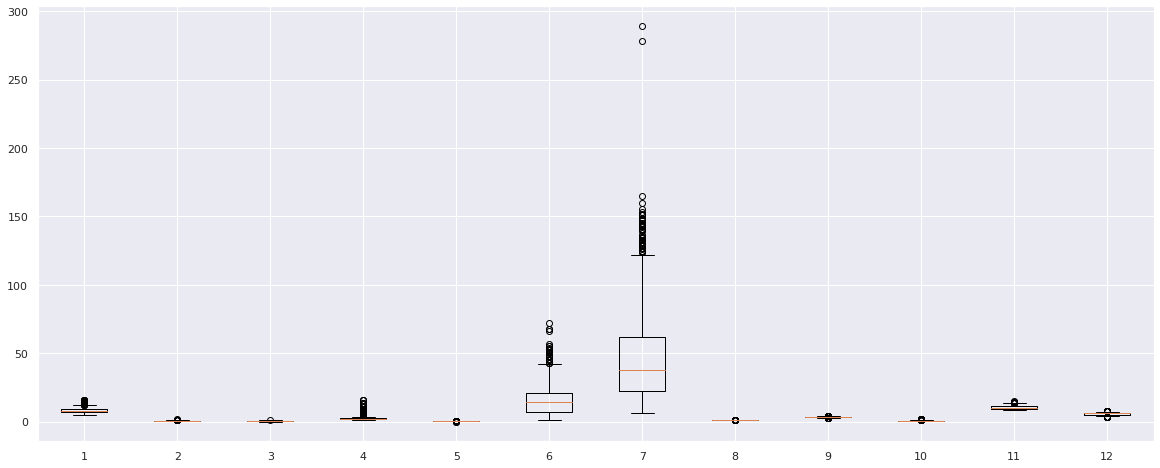

In [24]:
plt.figure(figsize=(20,8))
plt.boxplot(df)
plt.show()

<AxesSubplot:>

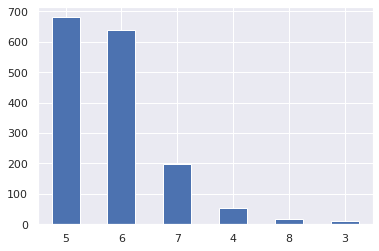

In [25]:
bl=df['quality'].value_counts()
bl.plot(kind='bar',rot=360)

In [26]:
g = df[df['quality'] < 6.5].shape[0]
b = df[df['quality'] > 6.5].shape[0]
print(f"Bad wines: {g}\nGood wines {b}\nBad wines percentage: {g/(g+b)*100:.2f}%\nGood wines percentage: {b/(g+b)*100:.2f}%")

Bad wines: 1382
Good wines 217
Bad wines percentage: 86.43%
Good wines percentage: 13.57%


In [27]:
print(df.shape)
from scipy import stats
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
print(df.shape)
# No outliers using the zscore method

(1599, 12)
(1599, 12)


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


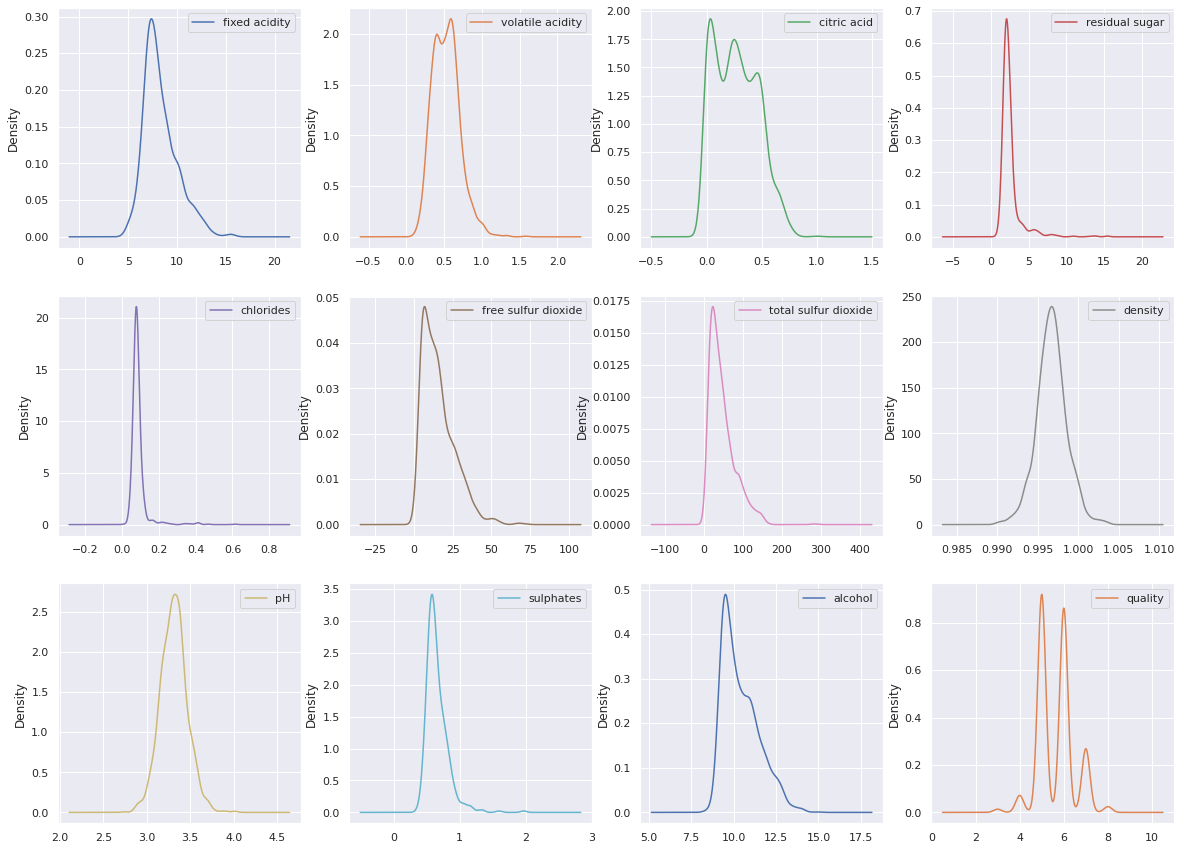

In [28]:
df.plot(kind= 'kde' , subplots=True, layout=(3,4), sharex=False, sharey=False, figsize=(20,15))
plt.show()

In [29]:
df['chlorides'] = df['chlorides'].apply(lambda x : np.log(x))
df['total sulfur dioxide'] = df['total sulfur dioxide'].apply(lambda x : np.log(x))
df['sulphates'] = df['sulphates'].apply(lambda x : np.log(x))
df['residual sugar'] = df['residual sugar'].apply(lambda x : np.log(x))
data = df.copy()

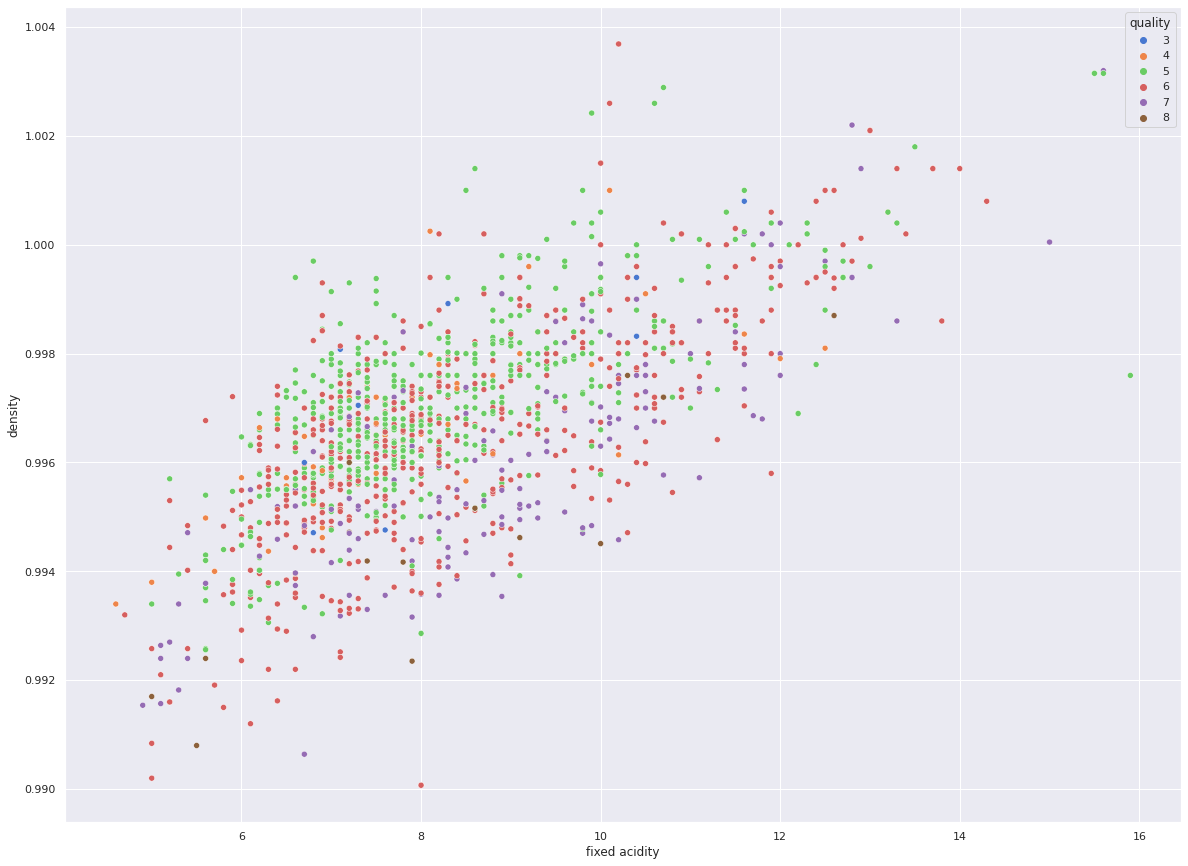

In [30]:
plt.figure(figsize=(20,15))
sns.scatterplot(x=df['fixed acidity'],y=df['density'],hue=df['quality'],palette="muted")
plt.show()

In [31]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = {5: 25000, 6: 25000, 7: 25000, 4: 25000, 8: 25000, 3: 25000})
X_test_os,y_test_os = sm.fit_resample(df.drop(['quality'],axis=1),df['quality'])

/opt/conda/lib/python3.7/site-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (25000) in class 5 will be larger than the number of samples in the majority class (class #5 -> 681)
  f"After over-sampling, the number of samples ({n_samples})"
/opt/conda/lib/python3.7/site-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (25000) in class 6 will be larger than the number of samples in the majority class (class #5 -> 681)
  f"After over-sampling, the number of samples ({n_samples})"
/opt/conda/lib/python3.7/site-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (25000) in class 7 will be larger than the number of samples in the majority class (class #5 -> 681)
  f"After over-sampling, the number of samples ({n_samples})"
/opt/conda/lib/python3.7/site-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of

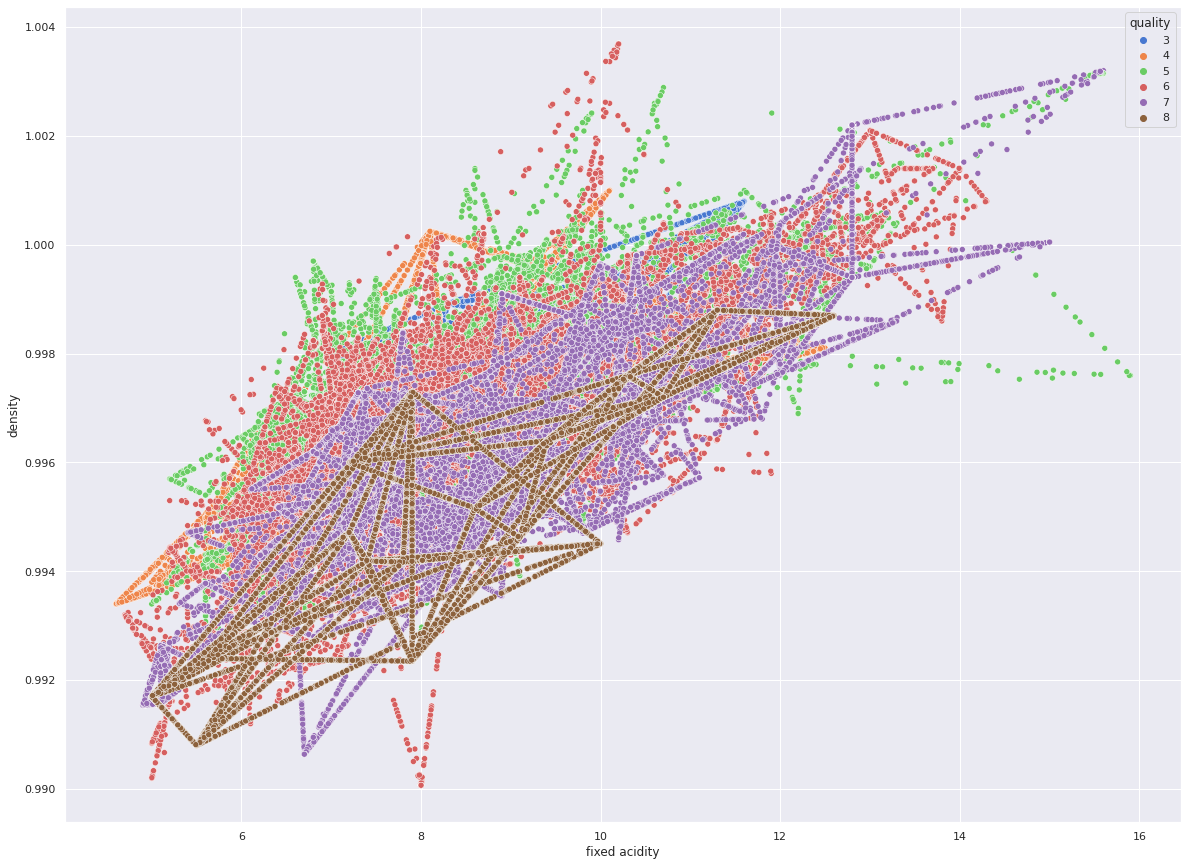

In [32]:
d = X_test_os.copy()
d['quality'] = y_test_os
plt.figure(figsize=(20,15))
sns.scatterplot(x=d['fixed acidity'],y=d['density'],hue=d['quality'],palette="muted")
plt.show()

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(X_test_os,y_test_os,train_size=0.5, test_size=0.2,random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid,train_size=0.5, test_size=0.5,random_state=0)

In [34]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
preds = tree.predict(X_valid)
print(classification_report(y_valid, preds))
print(confusion_matrix(y_valid, preds))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00      2469
           4       0.98      0.99      0.99      2466
           5       0.96      0.94      0.95      2505
           6       0.95      0.95      0.95      2491
           7       0.98      0.99      0.98      2538
           8       1.00      1.00      1.00      2531

    accuracy                           0.98     15000
   macro avg       0.98      0.98      0.98     15000
weighted avg       0.98      0.98      0.98     15000

[[2466    1    0    2    0    0]
 [   0 2450    8    7    1    0]
 [   5   32 2358   95   15    0]
 [   0   14   81 2355   37    4]
 [   0    0    6   23 2504    5]
 [   0    0    0    1    2 2528]]


In [35]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
preds = forest.predict(X_valid)
print(classification_report(y_valid, preds))
print(confusion_matrix(y_valid, preds))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00      2469
           4       1.00      1.00      1.00      2466
           5       0.99      0.99      0.99      2505
           6       0.99      0.99      0.99      2491
           7       1.00      1.00      1.00      2538
           8       1.00      1.00      1.00      2531

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

[[2469    0    0    0    0    0]
 [   0 2466    0    0    0    0]
 [   0    6 2472   26    1    0]
 [   0    0   19 2465    5    2]
 [   0    0    0    3 2531    4]
 [   0    0    0    0    0 2531]]


In [36]:
xgb = xgb.XGBClassifier()
xgb = xgb.fit(X_train, y_train)
preds = xgb.predict(X_valid)
print(classification_report(y_valid, preds))
print(confusion_matrix(y_valid, preds))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:23:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           3       1.00      1.00      1.00      2469
           4       1.00      1.00      1.00      2466
           5       0.98      0.98      0.98      2505
           6       0.98      0.98      0.98      2491
           7       0.99      1.00      1.00      2538
           8       1.00      1.00      1.00      2531

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000

[[2469    0    0    0    0    0]
 [   0 2466    0    0    0    0]
 [   0    3 2450   49    3    0]
 [   0    2   40 2436   10    3]
 [   0    0    0    2 2533    3]
 [   0    0    0    0    0 2531]]


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [37]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
preds = knn.predict(X_valid)
print(classification_report(y_valid, preds))
print(confusion_matrix(y_valid, preds))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00      2469
           4       1.00      1.00      1.00      2466
           5       1.00      1.00      1.00      2505
           6       1.00      1.00      1.00      2491
           7       1.00      1.00      1.00      2538
           8       1.00      1.00      1.00      2531

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

[[2469    0    0    0    0    0]
 [   1 2464    1    0    0    0]
 [   0    1 2498    6    0    0]
 [   0    0    3 2485    2    1]
 [   0    0    0    1 2536    1]
 [   0    0    0    0    0 2531]]


In [38]:
# from sklearn.model_selection import GridSearchCV

# n_neighbors = [1,3]
# weights = ['uniform', 'distance']
# algorithm = ['auto', 'ball_tree']
# p = [1,2]
# metric = ['euclidean','manhattan','chebyshev','minkowski']
# grid = {'n_neighbors': n_neighbors,
#                'weights': weights,
#                'algorithm' : algorithm,
#                'p': p,
#                'metric': metric}
# print(random_grid)

# knn = KNeighborsClassifier()
# knn_random = GridSearchCV(estimator = knn, param_grid = grid,verbose = 2)
# knn_random.fit(X_train, y_train)
# print("End")


In [39]:
# Best parameters

# {'algorithm': 'auto',
#  'metric': 'manhattan',
#  'n_neighbors': 1,
#  'p': 1,
#  'weights': 'uniform'}

In [40]:
knn = KNeighborsClassifier(n_neighbors=1,leaf_size=10,p=1,metric='manhattan',algorithm='auto',weights='uniform')
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=10, metric='manhattan', n_neighbors=1, p=1)

In [41]:
pred = knn.predict(X_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

[[2456    0    0    0    0    0]
 [   0 2496    0    0    0    0]
 [   0    0 2465    1    0    0]
 [   0    0    2 2512    0    0]
 [   0    0    0    1 2565    0]
 [   0    0    0    0    0 2502]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00      2456
           4       1.00      1.00      1.00      2496
           5       1.00      1.00      1.00      2466
           6       1.00      1.00      1.00      2514
           7       1.00      1.00      1.00      2566
           8       1.00      1.00      1.00      2502

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



In [43]:
X = df.copy()
Y = X.quality
X.drop(['quality'], axis=1, inplace=True)

In [44]:
final_preds = knn.predict(X)
print(classification_report(Y,final_preds))
print(confusion_matrix(Y,final_preds))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        53
           5       1.00      1.00      1.00       681
           6       1.00      1.00      1.00       638
           7       1.00      1.00      1.00       199
           8       1.00      1.00      1.00        18

    accuracy                           1.00      1599
   macro avg       1.00      1.00      1.00      1599
weighted avg       1.00      1.00      1.00      1599

[[ 10   0   0   0   0   0]
 [  0  53   0   0   0   0]
 [  0   0 681   0   0   0]
 [  0   0   0 638   0   0]
 [  0   0   0   0 199   0]
 [  0   0   0   0   0  18]]
